In [1]:
import pandas as pd
import numpy as np
import cv2
from read_video import create_video_with_ellipse_overlay, get_ellipse_info_from_dataframe, overlay_ellipse_on_frame
from read_video import video_in, video_out, split_frame, convert_frame_to_rgb,overlay_mask
import matplotlib.pyplot as plt

from utils import get_ellipse_mask


/Users/jonaheaton/Documents/GitHub/hula_hoop/.conda/lib/python3.11/site-packages/threadpoolctl.py:1214: RuntimeWarning: 
Found Intel OpenMP ('libiomp') and LLVM OpenMP ('libomp') loaded at
the same time. Both libraries are known to be incompatible and this
can cause random crashes or deadlocks on Linux when loaded in the
same Python program.
Using threadpoolctl may cause crashes or deadlocks. For more
information and possible workarounds, please see
    https://github.com/joblib/threadpoolctl/blob/master/multiple_openmp.md

  warnings.warn(msg, RuntimeWarning)


In [2]:
# why is there a difference?

csv_path = '/Users/jonaheaton/Documents/hulahoop_data/output_DSC_7450_hula_hoop_data.csv'


output_dir = '/Users/jonaheaton/Documents/hulahoop_data/output_7450'

input_video_path = '/Users/jonaheaton/Documents/hulahoop_data/videos/DSC_7450.MOV'

# csv_path= '/Users/jonaheaton/Documents/hulahoop_data/output_7450/test_data.csv'

# start_frame = 420
# max_frames = 150

output_video_path = '/Users/jonaheaton/Documents/hulahoop_data/output_7450/overlayed_org_video.mp4'

df = pd.read_csv(csv_path, index_col=0)
start_frame = 150
max_frames = 300
# start_frame = df.index[0]
# end_frame = df.index[-1]
# print(start_frame, end_frame)
# max_frames = end_frame - start_frame

create_video_with_ellipse_overlay(input_video_path, output_video_path, csv_path, start_frame=start_frame, max_frames=max_frames)

In [3]:
output_dir = '/Users/jonaheaton/Documents/hulahoop_data/output_7450'

input_video_path = '/Users/jonaheaton/Documents/hulahoop_data/videos/DSC_7450.MOV'

csv_path= '/Users/jonaheaton/Documents/hulahoop_data/output_7450/predicted_data.csv'

# df = pd.read_csv(csv_path, index_col=0)
# start_frame = df.index[0]
# end_frame = df.index[-1]
# print(start_frame, end_frame)
# max_frames = end_frame - start_frame

start_frame = 1892
max_frames = 400
slow_factor = 4

output_video_path = '/Users/jonaheaton/Documents/hulahoop_data/output_7450/overlayed4_predicted_video.mp4'


create_video_with_ellipse_overlay(input_video_path, output_video_path, csv_path,start_frame=start_frame, max_frames=max_frames,slow_factor=slow_factor)

In [7]:
output_dir = '/Users/jonaheaton/Documents/hulahoop_data/output_7450'

input_video_path = '/Users/jonaheaton/Documents/hulahoop_data/videos/DSC_7450.MOV'

csv_path= '/Users/jonaheaton/Documents/hulahoop_data/output_7450/predicted_data_extrapolate.csv'

df = pd.read_csv(csv_path, index_col=0)
start_frame = df.index[0]
end_frame = df.index[-1]
print(start_frame, end_frame)
max_frames = end_frame - start_frame

output_video_path = '/Users/jonaheaton/Documents/hulahoop_data/output_7450/overlayed_predicted_extrapolate_video.mp4'


create_video_with_ellipse_overlay(input_video_path, output_video_path, csv_path,start_frame=start_frame, max_frames=max_frames,slow_factor=slow_factor)


1886 2085


In [6]:
output_dir = '/Users/jonaheaton/Documents/hulahoop_data/output_7450'

input_video_path = '/Users/jonaheaton/Documents/hulahoop_data/videos/DSC_7450.MOV'

csv_path= '/Users/jonaheaton/Documents/hulahoop_data/output_7450/predicted_data.csv'

df = pd.read_csv(csv_path, index_col=0)
start_frame = df.index[0]
end_frame = df.index[-1]
print(start_frame, end_frame)
max_frames = end_frame - start_frame

output_video_path = '/Users/jonaheaton/Documents/hulahoop_data/output_7450/overlayed_predicted_video.mp4'


create_video_with_ellipse_overlay(input_video_path, output_video_path, csv_path,start_frame=start_frame, max_frames=max_frames)


1892 3623


In [7]:
output_dir = '/Users/jonaheaton/Documents/hulahoop_data/output_7450'

input_video_path = '/Users/jonaheaton/Documents/hulahoop_data/videos/DSC_7450.MOV'

csv_path= '/Users/jonaheaton/Documents/hulahoop_data/output_7450/test_data.csv'

# start_frame = 420
# max_frames = 150

output_video_path = '/Users/jonaheaton/Documents/hulahoop_data/output_7450/overlayed_test_video.mp4'

df = pd.read_csv(csv_path, index_col=0)
start_frame = df.index[0]
end_frame = df.index[-1]
print(start_frame, end_frame)
max_frames = end_frame - start_frame

create_video_with_ellipse_overlay(input_video_path, output_video_path, csv_path, start_frame=start_frame, max_frames=max_frames)

425 599


In [3]:
start_frame

Index(['top ellipse X', 'top ellipse Y', 'bottom ellipse X',
       'bottom ellipse Y', 'top ellipse Major Axis', 'top ellipse Minor Axis',
       'bottom ellipse Major Axis', 'bottom ellipse Minor Axis',
       'top ellipse Angle', 'bottom ellipse Angle'],
      dtype='object')

In [6]:
df.index[0]

425

In [12]:
df = pd.read_csv(csv_path, index_col=0)
cap, width, height, fps = video_in(input_video_path)
iter = 0


if iter < start_frame:
    cap.set(cv2.CAP_PROP_POS_FRAMES, start_frame)
    iter = start_frame

while iter < start_frame+max_frames:
    # Read the next frame
    ret, frame = cap.read()
    if not ret:
        # We reached the end of the video
        break

    break
    
cap.release()

In [20]:
top_half, bottom_half = split_frame(convert_frame_to_rgb(frame))

In [21]:
top_ellipse_info, bottom_ellipse_info = get_ellipse_info_from_dataframe(df, iter)


In [29]:
top_ellipse_mask = get_ellipse_mask(top_half, top_ellipse_info)
bottom_ellipse_mask = get_ellipse_mask(bottom_half, bottom_ellipse_info)
join_mask = np.vstack((top_ellipse_mask, bottom_ellipse_mask))
# convert mask to binary
join_mask = cv2.cvtColor(join_mask, cv2.COLOR_BGR2GRAY)

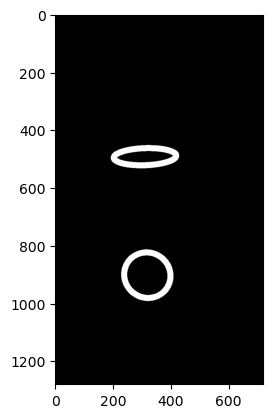

In [26]:
plt.imshow(join_mask)

In [30]:
overlay = overlay_mask(frame, join_mask)

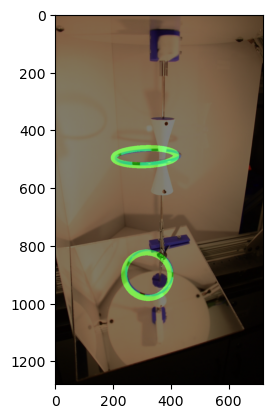

In [31]:
plt.imshow(overlay)

In [16]:
top_ellipse_info, bottom_ellipse_info = get_ellipse_info_from_dataframe(df, iter)
# overlay = overlay_ellipse_on_frame(frame, top_ellipse_info, bottom_ellipse_info)

top_frame, bottom_frame = overlay_ellipse_on_frame(frame, top_ellipse_info, bottom_ellipse_info)

top_ellipse_mask = get_ellipse_mask(

AssertionError: 

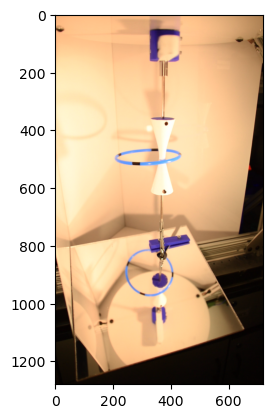

In [15]:
plt.imshow(frame)

In [ ]:
    df = pd.read_csv(csv_path, index_col=0)
    cap, width, height, fps = video_in(input_video_path)
    if output_video_path is not None:
        out = video_out(output_video_path, fps, width, height)
    iter = 0

    try:
        if iter < start_frame:
            cap.set(cv2.CAP_PROP_POS_FRAMES, start_frame)
            iter = start_frame

        while iter < start_frame+max_frames:
            # Read the next frame
            ret, frame = cap.read()
            if not ret:
                # We reached the end of the video
                break

            # Process the frame
            top_ellipse_info, bottom_ellipse_info = get_ellipse_info_from_dataframe(df, iter)
            overlay = overlay_ellipse_on_frame(frame, top_ellipse_info, bottom_ellipse_info)
            processed_frame = cv2.cvtColor(overlay, cv2.COLOR_RGB2BGR)

            # Write the processed frame to the new video file
            if output_video_path is not None:
                out.write(processed_frame)
            iter += 1
            # You can add code here to do something with the processed frame

    except Exception as e:
        print(f"An error occurred: {e}")
        print(f"Processed {iter} frames")

    finally:
        # Release the video capture and writer objects
        cap.release()
        if output_video_path is not None:
            out.release()

In [7]:
top_ellipse_info, bottom_ellipse_info = get_ellipse_info_from_dataframe(df, 425)

In [9]:
bottom_ellipse_info

[(319.08926, 103.04685), (155.96759, 162.00587), 120.54927]

In [8]:
top_ellipse_info


[(311.11118, 493.1302), (59.035374, 216.69914), 87.68561]

In [6]:
df.loc[425]

top ellipse X                311.111180
top ellipse Y                493.130200
bottom ellipse X             319.089260
bottom ellipse Y             103.046850
top ellipse Major Axis        59.035374
top ellipse Minor Axis       216.699140
bottom ellipse Major Axis    155.967590
bottom ellipse Minor Axis    162.005870
top ellipse Angle             87.685610
bottom ellipse Angle         120.549270
Name: 425, dtype: float64